In [9]:
%load_ext autoreload
%autoreload 2
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
db = ["HAM"]
models = ["RES", "DENSE", "MOBILE"]
root = f"../../dataset/CAI 2025/{db[0]}/"

filepaths = {}
for i in range(len(models)):
    filepaths[models[i]] = f"{root}eval/df_test_{models[i]}_fair.csv"

df = pd.DataFrame()
for k, v in filepaths.items():
    tmp = pd.read_csv(v)
    tmp["model"] = k
    tmp["db"] = db[0]
    df = pd.concat([df, tmp])

df["accuracy"] = 0
df.loc[df["label"] == df["pred"], "accuracy"] = 1

In [11]:
distances = ["WD", "KUIPER", "AD", "CVM", "KS", "ED"]

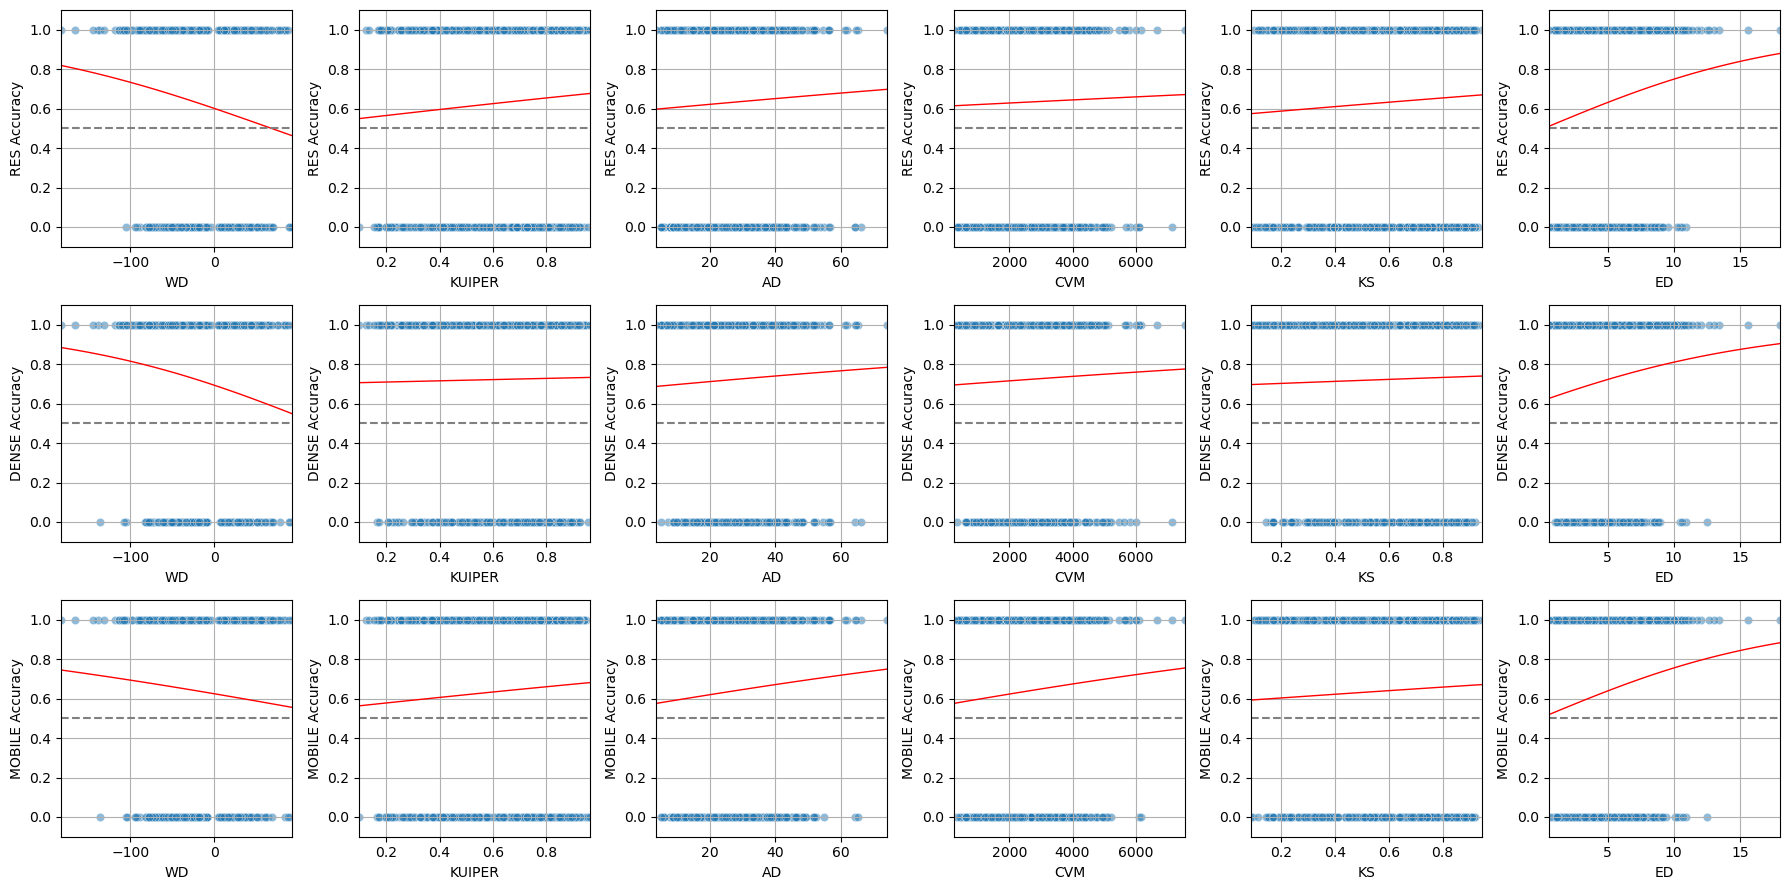

In [12]:
fig, ax = plt.subplots(3, 6, figsize=(18, 9))

for i in range(len(models)):
    for j in range(len(distances)):
        subset = df[(df["db"] == db[0]) & (df["model"] == models[i])]

        distance = distances[j]
        X = np.array(subset[distance]).reshape(-1, 1)
        y = subset["accuracy"]
        model = LogisticRegression()
        model.fit(X, y)
        
        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_prob = model.predict_proba(X_range)[:, 1]
        
        sns.scatterplot(data=subset, x=distance, y="accuracy", alpha=0.5, ax=ax[i, j])
        ax[i, j].plot(X_range, y_prob, color="red", linewidth=1)
        ax[i, j].set_xlabel(distance)
        ax[i, j].set_ylabel(f"{models[i]} Accuracy")
        ax[i, j].set_xlim(X.min(), X.max())
        ax[i, j].set_ylim(-0.1, 1.1) 
        ax[i, j].axhline(0.5, color="gray", linestyle="--") 
        ax[i, j].grid(True)

plt.tight_layout()
plt.show()

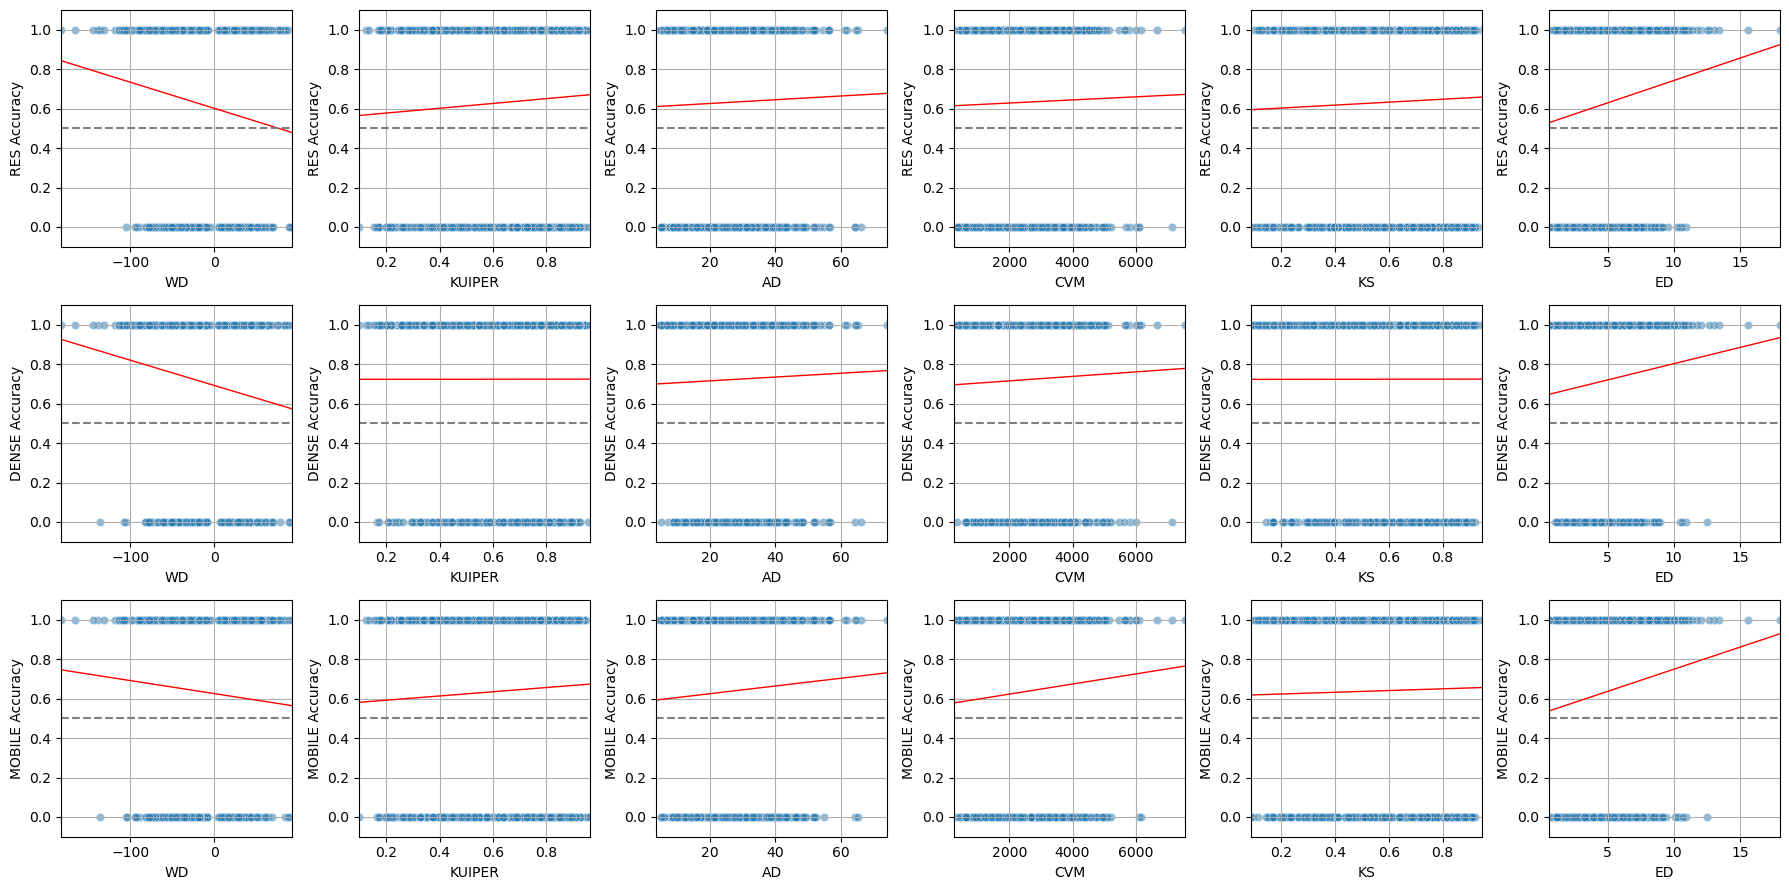

In [13]:
from sklearn.linear_model import BayesianRidge

fig, ax = plt.subplots(3, 6, figsize=(18, 9))

for i in range(len(models)):
    for j in range(len(distances)):
        subset = df[(df["db"] == db[0]) & (df["model"] == models[i])]

        distance = distances[j]
        X = np.array(subset[distance]).reshape(-1, 1)
        y = subset["accuracy"]
        model = BayesianRidge()
        model.fit(X, y)
        
        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_pred, y_std = model.predict(X_range, return_std=True)
        
        sns.scatterplot(data=subset, x=distance, y="accuracy", alpha=0.5, ax=ax[i, j])
        ax[i, j].plot(X_range, y_pred, color="red", linewidth=1)
        ax[i, j].set_xlabel(distance)
        ax[i, j].set_ylabel(f"{models[i]} Accuracy")
        ax[i, j].set_xlim(X.min(), X.max())
        ax[i, j].set_ylim(-0.1, 1.1) 
        ax[i, j].axhline(0.5, color="gray", linestyle="--") 
        ax[i, j].grid(True)

plt.tight_layout()
plt.show()